In [81]:
import pandas as pd
import time
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold



In [2]:
data = pd.read_csv('Data/bank-additional/bank-additional-full.csv',sep=';')

In [25]:
data.head


<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Corellation

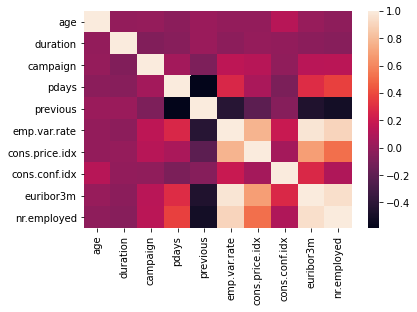

In [10]:
corr = data.corr()
figsize = (24,20)
sns.heatmap(corr)

## splitting and encoding the data

In [ ]:
#X = data.drop('y', axis=1).copy()
#y = data.y.copy()
#sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
#for train_index, test_index in sss.split(X,y):
 #   print("Train:", train_index, "Test:", test_index)
 #   original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
  #  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
#Check the Distribution of the labels


# Turn into an array
#original_Xtrain = original_Xtrain.values
#original_Xtest = original_Xtest.values
#original_ytrain = original_ytrain.values
#original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
#train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
#test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
#print('-' * 100)

#print('Label Distributions: \n')
#print(train_counts_label/ len(original_ytrain))
#print(test_counts_label/ len(original_ytest))

In [68]:
# splitting to X and y
X = data.drop(columns=['y','duration'], axis=1).copy()
encoder = LabelEncoder()
data['y'] = encoder.fit_transform(data["y"])

y = data.y
y.head()


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [70]:
# encoding the X data
# Get list of categorical variables
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

# encode
encoder = OneHotEncoder(sparse=False)
X_encoded= pd.DataFrame(encoder.fit_transform(X[object_cols]))
X_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
X.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] ,axis=1, inplace=True)
dta= pd.concat([X, X_encoded ], axis=1)
dta.head()

Categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
# Scaling the data
cols = dta.columns
scaler = MinMaxScaler()
scaler.fit(dta)
X_scaled = pd.DataFrame(scaler.transform(dta),columns=[cols])
X_scaled.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
## train test split to avoid leakage
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.1,random_state=1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(37069, 62)
(37069,)
(4119, 62)
(4119,)


## Dimentionality reduction and clustering

In [74]:
#t0 = time.time()
#X_reduced_tsne = TSNE(n_jobs=4).fit_transform(X_train.values)
#t1 = time.time()
#print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=62).fit_transform(X_train.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD().fit_transform(X_scaled.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

PCA took 0.19 s
Truncated SVD took 0.16 s


In [75]:
X_reduced_pca.shape

(37069, 62)

# Class imbalance

In [76]:
data['y'].value_counts()
y_train.value_counts()

0    32934
1     4135
Name: y, dtype: int64

there is a huge imbalance in our dataset this might bring issues when creating our model.Lets see how we can solve this problem

## How to deal with imbalanced data

There are many different ways to deal with imbalanced data but we will focus on SMOTE

## Using SMOTE

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [78]:
y_train_smote.value_counts()

1    32934
0    32934
Name: y, dtype: int64

Our data is now oversampled ratio btwn yes and no is the same

## Machine Learning Models

In [79]:
# Let's implement simple classifiers
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [80]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 90.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 89.0 % accuracy score
Classifiers:  SVC Has a training score of 90.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 84.0 % accuracy score


### 1 Logistic Regression (stratified K fold)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_scaled,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(xvl)[:,1]
    #pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.694533055804519
2 of KFold 5
ROC AUC score: 0.6817820121232133
3 of KFold 5
ROC AUC score: 0.6771728619274494
4 of KFold 5
ROC AUC score: 0.6819086117257419
5 of KFold 5
ROC AUC score: 0.6787696940710791


In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_logreg = logreg.fit(X_train_smote, y_train_smote)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


#### Confusion matrix

In [155]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)

In [156]:
confusion_matrix

array([[3521,   93],
       [ 296,  209]], dtype=int64)

**Intepretating Confusion Matrix**


|  | Predicted: No | Predicted Yes |
| --- | --- | --- |
| Actual No |TN: 3521  | FP: 93 |
|  |  |  |
| Actual Yes |FN: 296  | TP: 209 |

1. Correct predictions: 3521 + 93 = 3614

2. Wrong Predictions: 296+209 = 505
  

#### model performance

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3614
           1       0.69      0.41      0.52       505

    accuracy                           0.91      4119
   macro avg       0.81      0.69      0.73      4119
weighted avg       0.89      0.91      0.89      4119



#### Roc curve

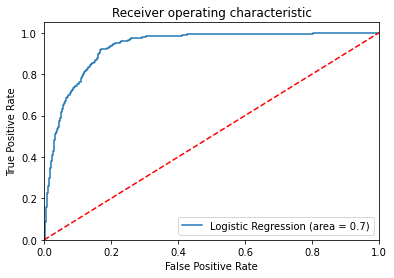

In [162]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#print("fpr{}, tpr{}". format(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.1f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### XgBoost

In [166]:
import xgboost as xgb
from xgboost import XGBClassifier


In [ ]:
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

In [168]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [169]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.58%


### SVM

In [181]:
from sklearn.svm import SVC
model = SVC()
#model.fit(X_train,y_train)

In [174]:
print('Accuracy on train data: ',model.score(X_train,y_train))
print('Accuracy on test data: ',model.score(X_test,y_test))


Accuracy on train data:  0.9063098545954841
Accuracy on test data:  0.8912357368293276


In [176]:
kernel = ["linear","rbf","poly","sigmoid"]
for i in kernel:
    model = SVC(kernel= i)
    model.fit(X_train,y_train)
    print ('Kernel: ', i)
    print ('Accuracy: ', model.score(X_test,y_test))

Kernel:  linear
Accuracy:  0.8977907259043457
Kernel:  rbf
Accuracy:  0.8912357368293276
Kernel:  poly
Accuracy:  0.8958485069191552
Kernel:  sigmoid
Accuracy:  0.8329691672736101


In [179]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,100,1000], 'kernel' : ["linear","rbf","poly","sigmoid"], 'degree': [1,2,3,4,5,6]}
grid = GridSearchCV(model, param_grid)
grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [180]:
print(grid.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'